
Introduction 
===

In this notebook we will demonstrate two methods of 

### 1. Willmore Energy Flow:

The Willmore energy is defined by: 

$$
E=\int_{M} H^{2} d A
$$

The discrete Willmore energy is defined by:

$$
E_{\text {discrete }}=\sum_{i \in V}(H N)_{i}^{2} / A_{i}
$$

Noting that
$$
\nabla E_{W}(f) = \frac{1}{4}\langle\langle\Delta f, \Delta f\rangle\rangle=\frac{1}{4}\left\langle\left\langle\Delta^{2} f, f\right\rangle\right\rangle
$$

$$
\dot{f} = -\nabla E_{W}(f) =-\frac{1}{2} \Delta^{2} f
$$

##### NOTE: This should be $C_{i}$ and not $A_{i}$? I believe this is a typo in the notes. Read the papers again.
##### NOTE 2: Why do we only devide by $C_{i}$  once; $H N)_{i}$ is the integrated mean curvature over a vertex neighbourhood, so $(H N)_{i}^{2}$ contains a factor of squared area and we cancel one of those factors out. Remember that we want to integrate mean curvature squared over the whole surface.

The change in time is defined by:
$$
\frac{d}{d t}= -\nabla_{f} E
$$


### 2. Mean Curvature Flow:

Energy defined by:
$$
E(f)=\int_{M} d A
$$

Differential energy by:
$$
\delta E=2 H N d A
$$

Surface change over time:
$$
\frac{d}{d t} f=-2 H N
$$

Discretised differential:

$$
f_{i}^{k+1}=f_{i}^{k}-\frac{\tau}{2} \sum_{i j \in \operatorname{St}(i)}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{j}^{k}-f_{i}^{k}\right)
$$

### 3. Gauss Energy Flow (TODO):

Energy defined by:
$$
E(f)=\int_{M} H d A
$$

Differential energy by:
$$
\delta E=K N d A
$$

Surface change over time:
$$
\frac{d}{d t} f=-K N
$$

Discretised differential:

$$
f_{i}^{k+1}=f_{i}^{k}-\frac{\tau}{2} \sum_{i j \in \mathrm{St}(i)} \frac{\varphi_{i j}}{\ell_{i j}}\left(f_{j}^{k}-f_{i}^{k}\right)
$$


In [1]:
# NOTE: CP is used for the Equation of State:
try:
    from CoolProp.CoolProp import PropsSI
except ImportError:
    import sys
    !{sys.executable} -m pip install coolprop

Defaulting to user installation because normal site-packages is not writeable
  Using cached CoolProp-6.4.1.tar.gz (12.9 MB)
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-f0vjz2pf
       cwd: /tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/
  Complete output (232 lines):
  Cython will not be used; cy_ext is cpp
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linu

Failed to build coolprop
    Running setup.py install for coolprop ... error
    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-nqu_o97q/install-record.txt --single-version-externally-managed --user --prefix= --compile --install-headers /home/stefan_endres/.local/include/python3.9/coolprop
         cwd: /tmp/pip-install-ns0rlkqs/coolprop_4c7c70ab73904b3e89f1ed4ef1110e70/
    Complete output (229 lines):
    Cython will not be 

In [918]:
# Imports and physical parameters
# Imports and physical parameters
import numpy as np
import scipy
#from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import data, io
import sys
import skimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib notebook

from ddgclib import *
from ddgclib._complex import Complex
#from ddgclib.curvatures import plot_surface, curvature

# Colour scheme for surfaces
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue

# Parameters for a water droplet in air at standard laboratory conditions
#gamma = 0.0728  # N/m, surface tension of water at 20 deg C
gamma =71.03e-3  # N/m kg/s^2 = N m-1 surface tension of water used in SE
Volmue = 24.8e-6  # Volume (0units unknown (mL?) 0.01 mL = 0.01 cm^3)
Volume = 24.8e-9  # Volume L --> m3 (30.7 uL)
rho = 998   # kg/m3, density
g = 9.81  # m/s2
# Capillary rise parameters
theta_p = 69.4  * np.pi /180.0

#from ddgclib.curvatures import plot_surface, curvature
#!conda install --yes --prefix {sys.prefix} skimage


# Parameters for a water droplet in air at standard laboratory conditions
def eos(P=101.325, T=298.15):
    # P in kPa T in K 
    return PropsSI('D','T|liquid',298.15,'P',101.325,'Water') # density kg /m3

# Surface tension of water gamma(T)
def IAPWS(T=298.15): 
    T_C = 647.096  # K, critical temperature
    return 235.8e-3 * (1 -(T/T_C))**1.256 * (1 - 0.625*(1 - (T/T_C)))  # N/m

T_0 = 273.15 + 25  # K, initial tmeperature
P_0 = 101.325  # kPa, Ambient pressure
gamma = IAPWS(T_0)  # N/m, surface tension of water at 20 deg C
rho_0 = eos(P=P_0, T=T_0)  # kg/m3, density
g = 9.81  # m/s2

from ddgclib import *
from ddgclib._complex import Complex
#from ddgclib.curvatures import plot_surface, curvature

# Colour scheme for surfaces
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue

In [522]:
def mean_flow(HC, bV, m_0, tau=0.5, h_0=0.0, gravity_field=False):
    """
    Compute a single iteration of mean curvature flow
    :param HC: Simplicial complex
    :return:
    """
    #rint('-')
    # Define the normals (NOTE: ONLY WORKS FOR CONVEX SURFACES)
    # Note that the cache HC.V is an OrderedDict:
    N = []

    V = set(HC.V) - bV
    V_a = []
    f = []
    
    for v in V:
        f.append(v.x_a)
        
    f = np.array(f)
    #COM = numpy.average(nonZeroMasses[:,:3], axis=0, weights=nonZeroMasses[:,3])
    com = np.average(f, axis=0)
    #print(f'com = {com}')
    for v in V:         
        N.append(normalized(v.x_a - com)[0])
    
    NdA = []
    HNdA = []
    HN = []  # sum(HNdA_ij, axes=0) / C_ijk
    C = []
    for i, v in enumerate(V):
        F, nn = vectorise_vnn(v)
        try:
            c_outd = curvatures(F, nn, n_i=N[i])
        except IndexError:
            print(f'WARNING, IndexError in loop')
            c_outd = {}
            c_outd['HNdA_i'] = np.zeros(3)
            c_outd['C_ijk'] = np.array([1.0])
            c_outd['NdA_i'] = np.zeros(3)
            
        NdA.append(c_outd['NdA_i'])
        HN.append(c_outd['HNdA_i']/np.sum(c_outd['C_ijk']))
        C.append(np.sum(c_outd['C_ijk']))
        #f.append(v.x_a)

    H = np.nan_to_num(-np.array(HN))
    NdA = np.nan_to_num(np.array(NdA))
    dP = -gamma * H  # Hydrostatic pressure
    
    # Add volume perservation
    # First note that the volume gradient points in the same direction as the 
    # vector area NV (i.e. they are the same up to a constant factor).
    # Therefore we simply need to compute the different between the current 
    # volume and the equilibrium volume and add a scalar multiplier
    Rho = []
    for dp in dP:
        #p = 101.325 + dp
        p = 101.325 + np.sum(dp)  #TODO: Validate
        #print(f'p = {p}')
        rho = eos(P=p)  # kg m-3
        Rho.append(rho)
        # TODO: Compute local signed 
    Rho = np.array(Rho) 
    #print(f'Rho = {Rho}')
    V_eq = m_0/Rho  # m-3
    V_eq = np.mean(m_0/Rho)  # m-3
    V_eq =  0.02962e-6   # TEMPORARY
    print(f'V_eq = {V_eq}')
    
    N = np.array(N)
    #print(f'N_i = {N}')
    #print(f'NdA = {NdA}')
    if 0:
        print(f'np.sum(N) = {np.sum(N)}')
        print(f'np.sum(NdA) = {np.sum(NdA)}')
        print(f'np.sum(NdA*N) = {np.sum(NdA*N)}')
        print(f'NdA.dot(N) = {NdA.T.dot(N)}')
        print(f'sum NdA.dot(N) = {np.sum(NdA.T.dot(N))}')
    
    V_current = np.sum(C)/6.0
    print(f'V_current = {V_current}')
    #dV =  -(V_current - V_eq)*H
    V_current = V_eq *0.9   # TEMPORARY
    dV = 2* 6*(V_eq - V_current)*N
    
    # Add gravity force rho * g * h (Validated)
    if gravity_field:
        h = f[:, 2] - h_0
        g_v = np.zeros_like(dP)
        g_v[:, 2] = -g
        dg = rho*(h*g_v.T).T
    else:
        dg = np.zeros_like(dP)
    
    #dV = np.zeros_like(dP)
    
    df = dP + dV + dg
    #print(f'df = {df}')
    f_k = f + tau * df
    #print(f'df = {df}')
    for i, v in enumerate(V):
        #print(f'f_k[i] = {f_k[i]}')
        HC.V.move(HC.V[tuple(v.x_a)], tuple(f_k[i]))

    return HC

In [523]:
def mean_flow_old(HC, bV, h_0, tau=0.5):
    """
    Compute a single iteration of mean curvature flow
    :param HC: Simplicial complex
    :return:
    """
    #rint('-')
    # Define the normals (NOTE: ONLY WORKS FOR CONVEX SURFACES)
    # Note that the cache HC.V is an OrderedDict:
    N_i = []

    V = set(HC.V) - bV
    V_a = []
    f = []
    for v in V:
        N_i.append(normalized(v.x_a - np.array([0.0, 0.0, 0.0]))[0])
        f.append(v.x_a)
        
    f = np.array(f)
    HNdA = []
    HN = []  # sum(HNdA_ij, axes=0) / C_ijk
    for i, v in enumerate(V):
        F, nn = vectorise_vnn(v)
        try:
            c_outd = curvatures(F, nn, n_i=N_i[i])
        except IndexError:
            print(f'WARNING, IndexError in loop')
            c_outd = {}
            c_outd['HNdA_i'] = np.zeros(3)
            c_outd['C_ijk'] = np.array([1.0])
            
        HN.append(c_outd['HNdA_i']/np.sum(c_outd['C_ijk']))
        #f.append(v.x_a)

    #print(f'HNdA = { HNdA}')
    #print(f"(np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))  = {(np.sum(c_outd['H_ij_sum'])/np.sum(c_outd['C_ijk']))}")
    #print(f'HN = {HN}')
    #H = np.nan_to_num(-(1 / 2.0)*np.array(HN))
    H = np.nan_to_num(-np.array(HN))
    df = -gamma * H  # Hydrostatic pressure
    # Add gravity force rho * g * h (Validated)
    h = f[:, 2]
    g_v = np.zeros_like(df)
    g_v[:, 2] = -g
    df = df + rho*(h*g_v.T).T
    # Add volume perservation
    # First note that the volume gradient points in the same direction as the 
    # vector area NV (i.e. they are the same up to a constant factor).

    #print(f'df = {df}')
    f_k = f + tau * df
    print(f'df = {df}')
    for i, v in enumerate(V):
        #print(f'f_k[i] = {f_k[i]}')
        HC.V.move(HC.V[tuple(v.x_a)], tuple(f_k[i]))

    return HC

def Gauss_Bonnet(HC):
    """
    Compute a single iteration of mean curvature flow
    :param HC: Simplicial complex
    :return:
    """
    ## Computer Euler Characteristic:
    # Compute the number of vertices
    V = len(list(HC.V))
    # Compute the dges
    E = 0
    for v in HC.V:
        E += len(list(v.nn))
        
    E = E/2.0 # We have added precisely twice the number of edges through adding each connection
    # Compute the faces
    HC.dim = 2  # We have taken the boundary of the sphere
    HC.vertex_face_mesh()
    Faces = HC.simplices_fm
    F = len(Faces)
    
    # Compute Euler
    chi = V - E + F
    print(f'V = {V}')
    print(f'E = {E}')
    print(f'F = {F}')
    chi = V - E + F
    print(f'$\chi = V - E + F$ = {chi}')   
    
    
    return 

In [524]:
# Test changes for errors:
mean_flow(HC, bV, 1.0, tau=0.01)


NameError: name 'HC' is not defined

In [525]:
def regularize(HC, bV, tau_i=1e-1):
    """
    TODO: We need a solution for when the mesh has already degenerated 
          and np.min([minVn_norm, tau_glob]) = 0.0
    """
    V = set(HC.V) - bV
    f = []
    for v in V:
        f.append(v.x_a)
        
    f = np.array(f)
    V_corr = []
    tau_glob = np.inf
    for i, v in enumerate(V):
        Vn = []
        for vn in v.nn:
            Vn.append(vn.x_a - v.x_a)
        Vn = np.array(Vn)
        Vn_norm = np.linalg.norm(Vn, axis=1)
        maxVn_norm = np.max(np.linalg.norm(Vn, axis=1))
        minVn_norm = np.min(np.linalg.norm(Vn, axis=1))
        tau_glob = np.min([minVn_norm, tau_glob])
        meanvn_norm = np.mean(Vn_norm)
        v_corr = np.zeros_like(Vn[0])
        for vn, vn_norm in zip(Vn, Vn_norm):
            #print(f'v_corr = {v_corr}')
            if vn_norm >= meanvn_norm:
                c = minVn_norm - vn_norm
            else:
                c = maxVn_norm - vn_norm

            #print(f'c ={c}')
            v_corr = v_corr - c * vn
            #df[i] += 100 *c * vn

        np.sum(v_corr, axis=-1)    
        V_corr.append(v_corr)
    
    tau = tau_glob
    V_corr = np.array(V_corr)
    df = V_corr
    f_k = f + tau * df
    print(f' tau  = { tau }')
    for i, v in enumerate(V):
        #print(f'f_k[i] = {f_k[i]}')
        HC.V.move(HC.V[tuple(v.x_a)], tuple(f_k[i]))
        
    return HC

Analytical solution
===

In [919]:
import numpy as np
theta = 79 * np.pi/180.0  # Contact angel in radians
phi = np.linspace(0.0, np.pi)
phi = np.linspace(0.0, theta)
#phi = np.linspace(0.0, 2* np.pi)
a = (gamma/(rho * g))**0.5
a, phi

(0.0027113315675435677,
 array([0.        , 0.02813898, 0.05627796, 0.08441695, 0.11255593,
        0.14069491, 0.16883389, 0.19697287, 0.22511185, 0.25325084,
        0.28138982, 0.3095288 , 0.33766778, 0.36580676, 0.39394575,
        0.42208473, 0.45022371, 0.47836269, 0.50650167, 0.53464065,
        0.56277964, 0.59091862, 0.6190576 , 0.64719658, 0.67533556,
        0.70347455, 0.73161353, 0.75975251, 0.78789149, 0.81603047,
        0.84416945, 0.87230844, 0.90044742, 0.9285864 , 0.95672538,
        0.98486436, 1.01300335, 1.04114233, 1.06928131, 1.09742029,
        1.12555927, 1.15369825, 1.18183724, 1.20997622, 1.2381152 ,
        1.26625418, 1.29439316, 1.32253215, 1.35067113, 1.37881011]))

In [920]:
# Solve for b
def obj(b):
    theta = 79 * np.pi/180.0  # Contact angel in radians
    a = (gamma/(rho * g))**0.5
    phi = np.linspace(0.0, theta)
    h_r = (237/scale)*1e-3  # height m   scale = 84  # voxels / mm  (rechecked)
    r_r = (183/scale)*1e-3  # radius m
    h_r = h_r/a  # reduced h
    r_r = r_r/a # reduced r
    p = 2 * a / b
    y0 = [0.0 + 1e-9, 0.0 + 1e-9]
    y0 = [0.0 + 1e-12, 0.0 + 1e-12]
    def dydphi(y, phi, p):
        """
        In this equation x and z are reduced by a=(gamma/(rho * g))**0.5 as follows: x*=x/a and z*=x/a
        """
        x, z = y
        return np.array([ (x * np.cos(phi))/(1e-12 + x*z + x*p - np.sin(phi)),  # dxdphi
                          (x * np.sin(phi))/(1e-12 + x*z + x*p - np.sin(phi))   # dzdphi
                        ])
    sol = scipy.integrate.odeint(dydphi, y0, phi, args=(p,))
    r = abs(sol[:, 0][-1]*a)
    h = abs(np.max(sol[:,1]*a))
    print(f'r = {r}')
    print(f'h = {Volume}')
    v = a**3 * ( np.pi * r * (r * h + r * p - 2 * np.sin(theta)) )  # True volume in m3
    r, h, v, Volume
    print(f'v = {v}')
    print(f'Volume = {Volume}')
    print(f'(v - Volume)**2 = { (v - Volume)**2}')
    return (v - Volume)**2 + (h - h_r)**2 + (r - r_r)**2

In [921]:
brange = np.linspace(-1e10, 1e10, 100)
orange = []
for b in brange:
    orange.append(obj(b))

r = 1.7597141267523382e-17
h = 2.48e-08
v = -2.1632985384332623e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759713045006899e-17
h = 2.48e-08
v = -2.1632972085932092e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7597135261081978e-17
h = 2.48e-08
v = -2.1632978000334448e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759712788742795e-17
h = 2.48e-08
v = -2.1632968935558104e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759713697265632e-17
h = 2.48e-08
v = -2.1632980104452504e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.75971372149824e-17
h = 2.48e-08
v = -2.163298040235524e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7597136631569397e-17
h = 2.48e-08
v = -2.163297968513846e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.75971407924021e-17
h = 2.48e-08
v = -2.1632984800243905e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r

r = 1.7597141267523382e-17
h = 2.48e-08
v = -2.1632985384332623e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759713045006899e-17
h = 2.48e-08
v = -2.1632972085932092e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7597135261081978e-17
h = 2.48e-08
v = -2.1632978000334448e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759712788742795e-17
h = 2.48e-08
v = -2.1632968935558104e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.759713697265632e-17
h = 2.48e-08
v = -2.1632980104452504e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.75971372149824e-17
h = 2.48e-08
v = -2.163298040235524e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7597136631569397e-17
h = 2.48e-08
v = -2.163297968513846e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.75971407924021e-17
h = 2.48e-08
v = -2.1632984800243905e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r

<IPython.core.display.Javascript object>


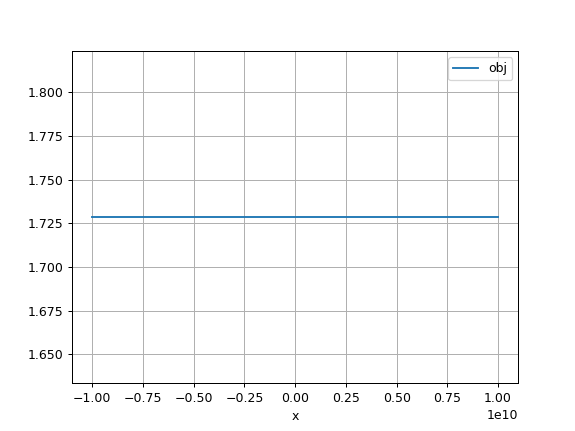

In [661]:
brange = np.linspace(-1e10, 1e10, 100)
orange = []
for b in brange:
    orange.append(obj(b))
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(brange ,orange, label='obj')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

r = 6.450449865038344e-17
h = 2.48e-08
v = -7.929838476599443e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000003e-16
r = 7.323198704619993e-17
h = 2.48e-08
v = -9.002749279682114e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000005e-16
r = 8.445442204915542e-17
h = 2.48e-08
v = -1.038237549211911e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000005e-16
r = 1.0012724121892955e-16
h = 2.48e-08
v = -1.2309108163137425e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000007e-16
r = 1.2547475749814808e-16
h = 2.48e-08
v = -1.542519642269407e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000008e-16
r = 1.8101897825230523e-16
h = 2.48e-08
v = -2.2253506254595632e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000012e-16
r = 5.163296859283025e-16
h = 2.48e-08
v = -6.347481423625962e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000032e-16
r = 1.7324290894437316e-16
h = 2.48e-08
v = -2.1297557830809678e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.15040000000001e-16
r 

<IPython.core.display.Javascript object>


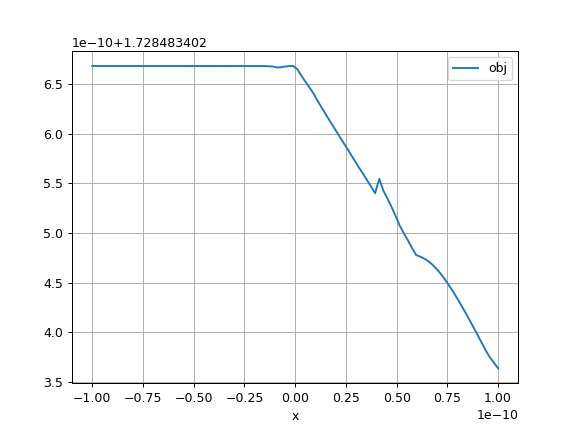

In [665]:
brange = np.linspace(0.0, 1e-10, 100)
brange = np.linspace(-1e-10, 1e-10, 100)
orange = []
for b in brange:
    orange.append(obj(b))
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(brange ,orange, label='obj')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

r = 9.814183424231278e-05
h = 2.48e-08
v = -1.2032327406270388e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156369482162538e-16
r = 9.913273679612228e-05
h = 2.48e-08
v = -1.2153813600033124e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156429768697467e-16
r = 0.00010012362627900061
h = 2.48e-08
v = -1.2275298195605684e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156490054734478e-16
r = 0.00010111456140614559
h = 2.48e-08
v = -1.2396788371987704e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156550343836126e-16
r = 0.00010210536443527505
h = 2.48e-08
v = -1.2518262396954542e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156610625217824e-16
r = 0.00010309627434180384
h = 2.48e-08
v = -1.2639749489593761e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156670913379511e-16
r = 0.00010408710882409388
h = 2.48e-08
v = -1.2761227360216046e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.156731197259904e-16
r = 0.00010507792964682272
h = 2.48e-08
v = -1.2882703560675533e-11
Volume = 2.48e-08
(v - Volume)**2 = 6.15679148060660

<IPython.core.display.Javascript object>


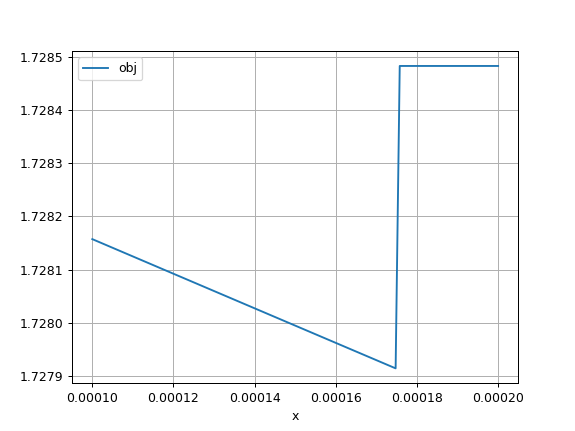

In [676]:
brange = np.linspace(1e-4, 2e-4, 100)
orange = []
for b in brange:
    orange.append(obj(b))
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(brange ,orange, label='obj')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [ ]:
0.000174747

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


r = 2.7113315675435675e-15
h = 2.48e-08
v = inf
Volume = 2.48e-08
(v - Volume)**2 = inf
r = 6.520519860502781e-16
h = 2.48e-08
v = -8.015978771554097e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.15040000000004e-16
r = 9.78308302514335e-17
h = 2.48e-08
v = -1.2026799630643889e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000007e-16
r = 1.5435695607907192e-16
h = 2.48e-08
v = -1.8975819561051876e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.15040000000001e-16
r = 2.1021808805437212e-16
h = 2.48e-08
v = -2.5843088699842053e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000013e-16
r = 2.532607643882834e-16
h = 2.48e-08
v = -3.1134525381961215e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000015e-16
r = 2.961420182047135e-16
h = 2.48e-08
v = -3.640611764214683e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000018e-16
r = 3.391771303156439e-16
h = 2.48e-08
v = -4.169662441910298e-23
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000022e-16
r = 3.825857208632284e-16
h = 2.48e-08
v 

r = 1.5811696819025463e-17
h = 2.48e-08
v = -1.9438055362933227e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.5819617736260866e-17
h = 2.48e-08
v = -1.944779291542422e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.5827445925131817e-17
h = 2.48e-08
v = -1.945741647261778e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.5835190407008152e-17
h = 2.48e-08
v = -1.9466937124904024e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.584283185948701e-17
h = 2.48e-08
v = -1.9476331118353133e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.5850388256365542e-17
h = 2.48e-08
v = -1.948562054899112e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.585783530647895e-17
h = 2.48e-08
v = -1.9494775554557682e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.5865229632786973e-17
h = 2.48e-08
v = -1.950386574429456e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-1

r = 1.6559067513453958e-17
h = 2.48e-08
v = -2.0356832967968937e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.656246344342011e-17
h = 2.48e-08
v = -2.0361007742848963e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.656583674128563e-17
h = 2.48e-08
v = -2.036515469503355e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.656919318319805e-17
h = 2.48e-08
v = -2.0369280925409887e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.657252502097027e-17
h = 2.48e-08
v = -2.0373376908770685e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6575846996548365e-17
h = 2.48e-08
v = -2.0377460768076894e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.657913177118569e-17
h = 2.48e-08
v = -2.03814988945339e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.658239080899343e-17
h = 2.48e-08
v = -2.0385505381507553e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r

r = 1.6879315940917034e-17
h = 2.48e-08
v = -2.0750529276098833e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6880946375962208e-17
h = 2.48e-08
v = -2.0752533645840837e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6882567496023383e-17
h = 2.48e-08
v = -2.075452656423914e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6884170227455963e-17
h = 2.48e-08
v = -2.075649687663983e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6885778153651407e-17
h = 2.48e-08
v = -2.0758473575204462e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6887361481615742e-17
h = 2.48e-08
v = -2.0760420034017876e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.688894503395128e-17
h = 2.48e-08
v = -2.076236676866126e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.6890543181177832e-17
h = 2.48e-08
v = -2.0764331445483957e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e

r = 1.703673157486252e-17
h = 2.48e-08
v = -2.0944047646874944e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7037713314730465e-17
h = 2.48e-08
v = -2.0945254545421223e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.70386965360317e-17
h = 2.48e-08
v = -2.094646326516245e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.703968713691043e-17
h = 2.48e-08
v = -2.0947681056962006e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7040657931301266e-17
h = 2.48e-08
v = -2.094887449972347e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7041640749696913e-17
h = 2.48e-08
v = -2.0950082724154087e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7042611919919586e-17
h = 2.48e-08
v = -2.0951276628943133e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7043567317089078e-17
h = 2.48e-08
v = -2.0952451143183238e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-1

r = 1.714274882953052e-17
h = 2.48e-08
v = -2.107437959601674e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.71433932335639e-17
h = 2.48e-08
v = -2.107517179190946e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.714403008913304e-17
h = 2.48e-08
v = -2.1075954708123503e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.714468845546916e-17
h = 2.48e-08
v = -2.1076764068525302e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7145317666622197e-17
h = 2.48e-08
v = -2.1077537587102574e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7145979598541877e-17
h = 2.48e-08
v = -2.107835133084232e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7146604456569928e-17
h = 2.48e-08
v = -2.1079119497920293e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7147254650350115e-17
h = 2.48e-08
v = -2.107991881141843e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r

r = 1.72089306184506e-17
h = 2.48e-08
v = -2.1155739951693343e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.720938769343019e-17
h = 2.48e-08
v = -2.115630185525499e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7209869947025755e-17
h = 2.48e-08
v = -2.1156894712062002e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7210345883460266e-17
h = 2.48e-08
v = -2.1157479802888693e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7210806356251623e-17
h = 2.48e-08
v = -2.1158045883538604e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.721127957638635e-17
h = 2.48e-08
v = -2.1158627635091458e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7211743667846667e-17
h = 2.48e-08
v = -2.1159198164339665e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.721220684365941e-17
h = 2.48e-08
v = -2.115976756793967e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16

v = -2.1219901603519e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7261482787223492e-17
h = 2.48e-08
v = -2.1220344780494545e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7261847052877327e-17
h = 2.48e-08
v = -2.122079258922925e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.726218556130621e-17
h = 2.48e-08
v = -2.1221208733407622e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.726254288669796e-17
h = 2.48e-08
v = -2.1221648010154894e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7262892621256524e-17
h = 2.48e-08
v = -2.1222077955137362e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.726324631138784e-17
h = 2.48e-08
v = -2.1222512762889656e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.726359558240386e-17
h = 2.48e-08
v = -2.1222942138017692e-24
Volume = 2.48e-08
(v - Volume)**2 = 6.150400000000002e-16
r = 1.7263949340367527e-17
h = 2.48e-08


<IPython.core.display.Javascript object>


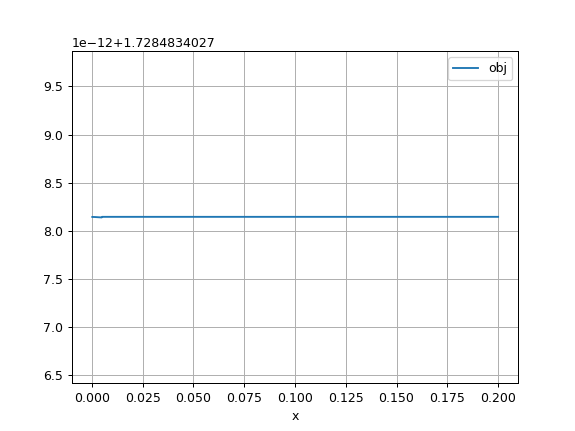

In [666]:
brange = np.linspace(0.0, 1e-10, 100)
brange = np.linspace(0.0, 0.2, 1000)
orange = []
for b in brange:
    orange.append(obj(b))
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(brange ,orange, label='obj')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [664]:
import scipy

scipy.optimize.minimize(obj, b)

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

In [703]:
phi = np.linspace(theta, 0.0)
phi

array([1.37881011, 1.35067113, 1.32253215, 1.29439316, 1.26625418,
       1.2381152 , 1.20997622, 1.18183724, 1.15369825, 1.12555927,
       1.09742029, 1.06928131, 1.04114233, 1.01300335, 0.98486436,
       0.95672538, 0.9285864 , 0.90044742, 0.87230844, 0.84416945,
       0.81603047, 0.78789149, 0.75975251, 0.73161353, 0.70347455,
       0.67533556, 0.64719658, 0.6190576 , 0.59091862, 0.56277964,
       0.53464065, 0.50650167, 0.47836269, 0.45022371, 0.42208473,
       0.39394575, 0.36580676, 0.33766778, 0.3095288 , 0.28138982,
       0.25325084, 0.22511185, 0.19697287, 0.16883389, 0.14069491,
       0.11255593, 0.08441695, 0.05627796, 0.02813898, 0.        ])

In [994]:
import scipy.integrate
import numpy as np

theta = 79 * np.pi/180.0  # Contact angel in radians
phi = np.linspace(0.0, np.pi)
phi = np.linspace(0.0, theta)
phi = np.linspace(theta, 0.0)
#phi = np.linspace(0.0, 2* np.pi)
a = (gamma/(rho * g))**0.5
a, phi
#b_guess = 1e-5
# Picture measurements:
scale = 84  # voxels / mm  (rechecked)
h = (237/scale)*1e-3  # height m   scale = 84  # voxels / mm  (rechecked)
r = (183/scale)*1e-3  # radius m

h = (150/scale)*1e-3  # height m   scale = 84  # voxels / mm  (rechecked)
r = (128/scale)*1e-3  # radius m

h = (149/scale)*1e-3  # height m   scale = 
r = (215/scale)*1e-3  # radius m

print(f'h data = {h * 1e3} mm = {h} m')
print(f'r data = {r * 1e3} mm = {r} m')
h = h/a  # reduced h
r = r/a # reduced r
print(f'h_r data = {h}')
print(f'r_r data = {r}')
# Solve Equattion 2 from phi = 0 to phi = theta
b = 1e-4
b = 8.835e-6
#b = -0.000174747
#b = -0.0001
b = 8.835e-8
b = 6.45e-8
b = 4.775e-13
b = 3.15e-8
b = 8.835e-8
b = 4e-3

p = 2 * a / b
y0 = [-r, -h]
y0 = [r, h]
y0 = [0.0 + 1e-9, 0.0 + 1e-9]
y0 = [0.0 + 1e-12, 0.0 + 1e-12]
y0 = [0.0 + 1e-12, 0.0 + 1e-12]
y0 = [-r, -h]
y0 = [r, h]
print(f'y0 = {y0}')
def dydphi(y, phi, p):
    """
    In this equation x and z are reduced by a=(gamma/(rho * g))**0.5 as follows: x*=x/a and z*=x/a
    """
    x, z = y
    return np.array([(x * np.cos(phi))/(x*z + x*p - np.sin(phi)),  # dxdphi
                     (x * np.sin(phi))/(x*z + x*p - np.sin(phi))   # dzdphi
                    ])

sol = scipy.integrate.odeint(dydphi, y0, phi, args=(p,))

#r = abs(sol[:, 0][-1]*a)
#h = abs(sol[:, 1][-1]*a)
r = abs(sol[:, 0][-1])
h = abs(sol[:, 1][-1])
v = a**3 * ( np.pi * r * (r * h + r * p - 2 * np.sin(theta)) )  # True volume in m3
print(f'v = {v}')
print(f'Volume = {Volume}')
r, h, v, Volume

h data = 1.773809523809524 mm = 0.0017738095238095239 m
r data = 2.5595238095238093 mm = 0.0025595238095238093 m
h_r data = 0.6542208061320117
r_r data = 0.9440098880428356
y0 = [0.9440098880428356, 0.6542208061320117]
v = -2.6289749271024664e-08
Volume = 2.48e-08


(0.7617925856087188, 0.498023889049223, -2.6289749271024664e-08, 2.48e-08)

In [995]:
h*1e3, r*1e3

(498.023889049223, 761.7925856087188)

In [996]:
abs(sol[:, 0][-1]*a), abs(np.max(sol[:,1]*a))

(0.002065472285281555, 0.0017738095238095239)

In [997]:
abs(sol[:, 0][-1]*a), abs(np.max(sol[:, 1][-1]*a))

(0.002065472285281555, 0.0013503078917699736)

In [998]:
r = abs(sol[:, 0][-1]*a)
h = abs(np.max(sol[:,1]*a))
r, h

(0.002065472285281555, 0.0017738095238095239)

In [999]:
h = (237/scale)*1e-3  # height m   scale = 84  # voxels / mm  (rechecked)
r = (183/scale)*1e-3  # radius m
r, h

(0.0021785714285714286, 0.0028214285714285715)

In [1000]:
np.min(sol[:, 0]*a) 

0.0016684622468533196

In [1001]:
sol[:, 0]*a * 1e3, sol[:, 1]*a * 1e3

(array([2.55952381, 2.54317943, 2.52404286, 2.50191472, 2.47655842,
        2.44768799, 2.41494962, 2.37789322, 2.33592704, 2.28823932,
        2.23365352, 2.17032978, 2.0950486 , 2.00100314, 1.86629509,
        1.66846225, 2.46273657, 2.45364497, 2.44424642, 2.43455124,
        2.42457013, 2.41431407, 2.40379433, 2.39302243, 2.38201018,
        2.37076959, 2.35931286, 2.3476524 , 2.33580076, 2.32377064,
        2.31157484, 2.29922626, 2.28673787, 2.27412266, 2.26139367,
        2.24856393, 2.23564643, 2.22265411, 2.20959987, 2.1964965 ,
        2.18335669, 2.17019298, 2.15701779, 2.14384334, 2.13068169,
        2.11754469, 2.10444397, 2.09139094, 2.07839674, 2.06547229]),
 array([ 1.77380952,  1.69564351,  1.61545822,  1.53307832,  1.44828201,
         1.36078496,  1.27021583,  1.17607816,  1.07768907,  0.97407244,
         0.86375995,  0.74437713,  0.61164116,  0.45624269,  0.24742168,
        -0.04394822,  1.55503787,  1.54323295,  1.53171492,  1.52049334,
         1.50957735,  1.49

<IPython.core.display.Javascript object>


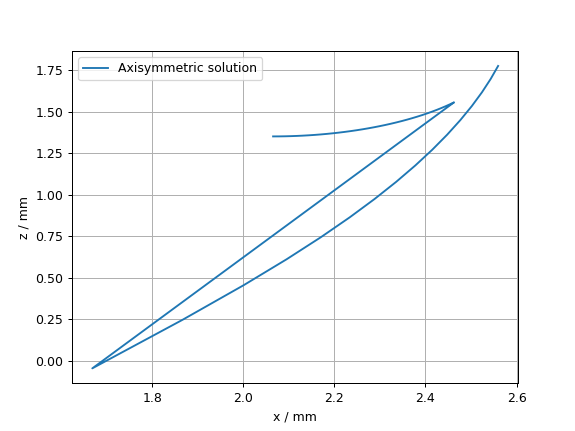

In [1004]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot()
#plt.plot(phi, sol[:, 0], 'b', label='x(phi)')
#plt.plot(phi, sol[:, 1], 'g', label='z(phi)')
#plt.plot(sol[:, 0]*a, sol[:,1]*a, 'b', label='z')
#plt.plot(sol[:, 0]*a + r, sol[:,1]*a + h, 'b', label='shifted')
plt.plot(sol[:, 0]*a * 1e3 , sol[:,1]*a * 1e3, label='Axisymmetric solution')
#plt.plot(sol[:, 0]*a * 1e3 , sol[:,1]*a * 1e3, label='Axisymmetric solution')
#plt.plot(sol[:, 0] , sol[:, 1]   , label='Axisymmetric solution')
plt.legend(loc='best')
plt.xlabel('x / mm')
plt.ylabel('z / mm')
plt.grid()
plt.show()

In [795]:
import scipy.integrate
import numpy as np

theta = 79 * np.pi/180.0  # Contact angel in radians
phi = np.linspace(0.0, np.pi)
phi = np.linspace(0.0, theta)
phi = np.linspace(theta, 0.0)
#phi = np.linspace(0.0, 2* np.pi)
a = (gamma/(rho * g))**0.5
a, phi
#b_guess = 1e-5
# Picture measurements:
scale = 84  # voxels / mm  (rechecked)
h = (237/scale)*1e-3  # height m   scale = 84  # voxels / mm  (rechecked)
r = (183/scale)*1e-3  # radius m
h = h/a  # reduced h
r = r/a # reduced r
# Solve Equattion 2 from phi = 0 to phi = theta
b = 1e-4
b = 8.835e-6
#b = -0.000174747
#b = -0.0001
b = 8.835e-8
b = -6.45e-8
p = 2 * a / b
y0 = [-r, -h]
y0 = [r, h]
y0 = [0.0 + 1e-9, 0.0 + 1e-9]
y0 = [0.0 + 1e-12, 0.0 + 1e-12]
y0 = [0.0 + 1e-12, 0.0 + 1e-12]
y0 = [-r, -h]
y0 = [r*a, h*a]
def dydphi(y, phi, p):
    """
    In this equation x and z are reduced by a=(gamma/(rho * g))**0.5 as follows: x*=x/a and z*=x/a
    """
    x, z = y
    return np.array([ (x * np.cos(phi))/(x*z + x*p - np.sin(phi)),  # dxdphi
                      (x * np.sin(phi))/(x*z + x*p - np.sin(phi))   # dzdphi
                    ])

sol = scipy.integrate.odeint(dydphi, y0, phi, args=(p,))

r = abs(sol[:, 0][-1]*a)
h = abs(np.max(sol[:,1]*a))
v = a**3 * ( np.pi * r * (r * h + r * p - 2 * np.sin(theta)) )  # True volume in m3
print(f'v = {v}')
print(f'Volume = {Volume}')
r, h, v, Volume

v = -9.156787750025893e-13
Volume = 2.48e-08


(5.938377917619706e-06,
 7.675827343632609e-06,
 -9.156787750025893e-13,
 2.48e-08)

<IPython.core.display.Javascript object>


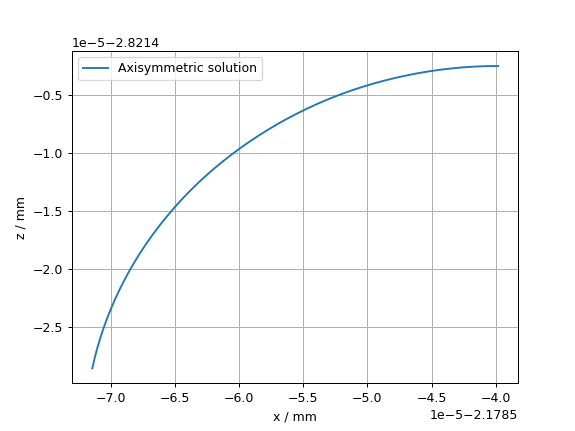

In [769]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot()
#plt.plot(phi, sol[:, 0], 'b', label='x(phi)')
#plt.plot(phi, sol[:, 1], 'g', label='z(phi)')
#plt.plot(sol[:, 0]*a, sol[:,1]*a, 'b', label='z')
#plt.plot(sol[:, 0]*a + r, sol[:,1]*a + h, 'b', label='shifted')
plt.plot(sol[:, 0]*a * 1e3 , sol[:,1]*a * 1e3, label='Axisymmetric solution')
#plt.plot(sol[:, 0] , sol[:, 1]   , label='Axisymmetric solution')
plt.legend(loc='best')
plt.xlabel('x / mm')
plt.ylabel('z / mm')
plt.grid()
plt.show()

Image processing
====

In [13]:
img_str = './data/hydrophillic_cropped.png'
I_png=plt.imread(img_str)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(I_png)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()


In [14]:
scale = 84  # voxels / mm

In [15]:
np.max(gray), np.min(gray)

(0.9998999999999999, 0.0)

In [16]:
import skimage
import skimage.feature
import skimage.viewer
import sys

# read command-line arguments
#filename = sys.argv[1]
filename =img_str
#sigma = 0.2
#low_threshold = float(sys.argv[3])
#high_threshold = float(sys.argv[4])
sigma = 5.0#2.0
sigma = 10.0#2.0
low_threshold = 0.1
high_threshold = 0.3

image = skimage.io.imread(fname=filename, as_gray=True)
#viewer = skimage.viewer(image=image)
viewer = skimage.viewer.ImageViewer(image=image)
viewer.show()
image_cropped = image#[210:400,180:440]




In [87]:
help(skimage.feature.canny)

Help on function canny in module skimage.feature._canny:

canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
    Edge filter an image using the Canny algorithm.
    
    Parameters
    -----------
    image : 2D array
        Grayscale input image to detect edges on; can be of any dtype.
    sigma : float
        Standard deviation of the Gaussian filter.
    low_threshold : float
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If True then treat low_threshold and high_threshold as quantiles of the
        edge magnitude image, rather than absolute edge magnitude valu

In [28]:
sigma = 3.0
sigma = 5.0
sigma = 5.5
low_threshold = 0.2#0.66#0.05 
low_threshold = 0.001#0.05 
low_threshold = 0.2#0.05 
high_threshold = 0.50

#max, min pair was = (0.4862258831709623, 0.0)
if 1:
    edges = skimage.feature.canny(
        image=image_cropped,
        sigma=sigma,
        low_threshold=low_threshold,
        high_threshold=high_threshold,
    )
viewer = skimage.viewer.ImageViewer(edges)
viewer.show()

[]

In [79]:
xpos, ypos = np.argwhere(edges)[:, 0], np.argwhere(edges)[:, 1]
xpos, ypos


(array([], dtype=int64), array([], dtype=int64))

In [17]:
np.savetxt('./data/output.txt', np.argwhere(edges), delimiter=';')

In [18]:
x0=166  # TODO: Detect maximum of edge contour to find symmetry automatically

#%%

k = 473 - 376 # a known length in pixel coordinates
l= 0.8 # this length in world coordinates in mm 
scale=l/k
scale = scale *1e-3  # Length in m

In [19]:
ymin = y0 #TODO: Check if this is correct
r=(xpos-x0)*scale;
"""translate the r-coordinate in pixel coordinates and convert into world coordinates"""
z=-(ypos-ymin)*scale;
"""same for z-coordinate"""
r, z

NameError: name 'y0' is not defined

In [20]:

plt.figure()
plt.scatter(z,-r)

NameError: name 'r' is not defined

<Figure size 432x288 with 0 Axes>

In [21]:

sdx= 0.00271746
sy0 = 0.000552137
syf = 0.00127012
sdy = syf - sy0
sdx, sdy

(0.00271746, 0.0007179830000000001)

In [22]:
z_c = z + sdx/2.0
plt.figure()
plt.scatter(z_c,-r)

NameError: name 'r' is not defined

<Figure size 432x288 with 0 Axes>

In [23]:

# Parameters for a water droplet in air at standard laboratory conditions
#gamma = 0.0728  # N/m, surface tension of water at 20 deg C
gamma = 71.03e-3  # N/m kg/s^2 = N m-1 surface tension of water used in SE
Volume = 0.02962  # Volume (0units unknown (mL?) 0.01 mL = 0.01 cm^3)
Volume = 0.02962e-6  # Volume (m)
Volume = 0.02962e-6   # Volume (m)
#Volume= 2.9619999999999997e-08  # V_eq 
#rho = 998   # kg/m3, density

m_0 = rho_0 * Volume  # kg

# Capillary rise parameters
theta_p = 69.4  * np.pi /180.0
# Capillary rise parameters
#TODO: COMPUTE CORRECT VOLUME OF CYLLINDER
#r = 0.5e-2  # Radius of the droplet sphere

#r = dx/2.0 
#r = 1
#theta_p = 0.35  # Contact angle

r = sdx/2.0 

h = Volume / ( np.pi * r**2 )  # V =  np.pi * r**2 * h 
h
#h = 0.0012  # TEMPORARY, Volume is way too low, problem with units?
#Volume_est =  np.pi * r**2 * h 
#Volume_est

0.005107035215221801

In [24]:

Volume, np.pi * r**2 * h

(2.962e-08, 2.962e-08)

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


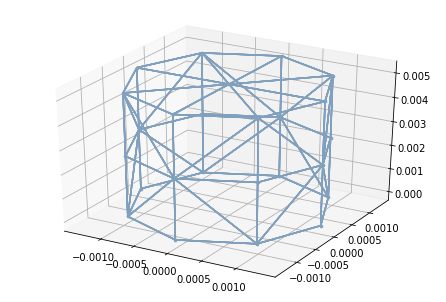

In [25]:

# Initiate a cubical complex
HC = Complex(3, domain=[(-r, r),]*3)
HC.triangulate()

for i in range(1):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == -r) or np.any(v.x_a == r):
        if np.any(v.x_a[2] == -r):
            if np.any(v.x_a[0:2] == -r) or  np.any(v.x_a[0:2] == r):
                continue
            else:
                del_list.append(v)
        else:
            continue    
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)

# Shrink to circle and move to zero
for v in HC.V:
    x = v.x_a[0]
    y = v.x_a[1]
    f_k = [x * np.sqrt(r**2 - y**2/2.0)/r, y * np.sqrt(r**2 - x**2/2.0)/r, v.x_a[2]]
    HC.V.move(v, tuple(f_k)) 
    
# Move up to zero (NOTE: DO NOT DO THIS IN THE CIRCLE LOOP 
# BECUASE SAME VERTEX INDEX BREAKS CONNECTIONS IN LOOP DURING MOVE: 
# TODO: FIX THIS IN THE hyperct LIBRARY CODE)
for v in HC.V:
    if (v.x_a[2] == -r) or (v.x_a[2] == 0.0):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == -r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))       
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))     
    
## Move to h
for v in HC.V:
    if (v.x_a[2] == 0.0) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + h - 2*r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == r):
        f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + 0.5*h - r]
        HC.V.move(v, tuple(f_k))  
    
# Find set of boundary vertices
bV = set()
for v in HC.V:
    #print('-')
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.x_a[2] == 0.0 = {v.x_a[2] == 0.0}')
    if v.x_a[2] == 0.0:
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue


fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

#axes.set_xlim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_ylim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_zlim3d(-(0.1*r + r) , 0.1*r + 2*r)

In [26]:

set(HC.V), set(HC.V) - bV

({<ddgclib._vertex.VertexCube at 0x1fcb38ab048>,
  <ddgclib._vertex.VertexCube at 0x1fcb390ef88>},
 {<ddgclib._vertex.VertexCube at 0x1fcb38ab708>,
  <ddgclib._vertex.VertexCube at 0x1fcb390ef88>})

In [27]:

#%%

len(set(HC.V)), len(set(bV)), len(set(HC.V) - bV)


(25, 8, 17)

In [28]:


#%%

HC.V.print_out()


Vertex cache of size: 25:
Vertex: (-0.0009607671968015978, -0.0009607671968015978, 0.0)
Connections: (0.0, -0.00135873, 0.0) (0.0, -0.00135873, 0.0025535176076109008) (-0.0009607671968015978, -0.0009607671968015978, 0.0025535176076109008) (-0.00135873, 0.0, 0.0) (-0.00135873, 0.0, 0.0025535176076109008) 
Vertex: (0.0009607671968015978, -0.0009607671968015978, 0.0)
Connections: (0.0, -0.00135873, 0.0) (0.00135873, 0.0, 0.0) (0.0, -0.00135873, 0.0025535176076109008) (0.00135873, 0.0, 0.0025535176076109008) (0.0009607671968015978, -0.0009607671968015978, 0.0025535176076109008) 
Vertex: (-0.0009607671968015978, 0.0009607671968015978, 0.0)
Connections: (-0.00135873, 0.0, 0.0025535176076109008) (-0.00135873, 0.0, 0.0) (0.0, 0.00135873, 0.0025535176076109008) (0.0, 0.00135873, 0.0) (-0.0009607671968015978, 0.0009607671968015978, 0.0025535176076109008) 
Vertex: (0.0009607671968015978, 0.0009607671968015978, 0.0)
Connections: (0.00135873, 0.0, 0.0) (0.0009607671968015978, 0.0009607671968015978,

In [29]:

#%%

#TEST
V_defective = [HC.V[(0.0, -r, 0.0)],   HC.V[(0.0, r, 0.0)], HC.V[(-r, 0.0, 0.0)], HC.V[( r, 0.0, 0.0)]]  
for v in V_defective:
    print(v)
    print(f'v.nn = {v.nn}')

v.nn = {<ddgclib._vertex.VertexCube object at 0x000001FCB390EF08>, <ddgclib._vertex.VertexCube object at 0x000001FCB38B6348>, <ddgclib._vertex.VertexCube object at 0x000001FCB38AB048>}
v.nn = {<ddgclib._vertex.VertexCube object at 0x000001FCB38AB508>, <ddgclib._vertex.VertexCube object at 0x000001FCB38AB4C8>, <ddgclib._vertex.VertexCube object at 0x000001FCB38B6408>}
v.nn = {<ddgclib._vertex.VertexCube object at 0x000001FCB390EF08>, <ddgclib._vertex.VertexCube object at 0x000001FCB38AB4C8>, <ddgclib._vertex.VertexCube object at 0x000001FCB38B6388>}
v.nn = {<ddgclib._vertex.VertexCube object at 0x000001FCB38AB508>, <ddgclib._vertex.VertexCube object at 0x000001FCB38AB048>, <ddgclib._vertex.VertexCube object at 0x000001FCB38B63C8>}


In [30]:
# Ensure the norm is correct
print(f'Norm test (all should be equal to r = {r}):')
for v in HC.V:
    print(f'v.x_a = {v.x_a}')
    #print(f'v in bHC_V: {v in bHC_V}')
    print(f'norm = {np.linalg.norm(v.x_a - HC.V[(0.0, 0.0, 0.0)].x_a)}')
# Ensure that the boundary doesn't contain the origin
print(f'Boundary test:')
for v in bV:
    print(f'v.x_a = {v.x_a}')
    if np.linalg.norm(v.x_a - HC.V[(0.0, 0.0, 0.0)].x_a) in bV:
        print(f'FAILURE: ORIGIN in bHC_V')

Norm test (all should be equal to r = 0.00135873):
v.x_a = [-0.00096077 -0.00096077  0.        ]
norm = 0.00135873
v.x_a = [ 0.00096077 -0.00096077  0.        ]
norm = 0.00135873
v.x_a = [-0.00096077  0.00096077  0.        ]
norm = 0.00135873
v.x_a = [0.00096077 0.00096077 0.        ]
norm = 0.00135873
v.x_a = [ 0.         -0.00135873  0.        ]
norm = 0.00135873
v.x_a = [-0.00135873  0.          0.        ]
norm = 0.00135873
v.x_a = [0.00135873 0.         0.        ]
norm = 0.00135873
v.x_a = [0.         0.00135873 0.        ]
norm = 0.00135873
v.x_a = [0.00096077 0.00096077 0.00510704]
norm = 0.005284690710194457
v.x_a = [-0.00096077 -0.00096077  0.00510704]
norm = 0.005284690710194457
v.x_a = [ 0.00096077 -0.00096077  0.00510704]
norm = 0.005284690710194457
v.x_a = [-0.00096077  0.00096077  0.00510704]
norm = 0.005284690710194457
v.x_a = [0.         0.         0.00510704]
norm = 0.0051070352152218015
v.x_a = [ 0.         -0.00135873  0.00510704]
norm = 0.005284690710194457
v.x_a =

In [ ]:

# Initiate a cubical complex
HC = Complex(3, domain=[(-r, r),]*3)
HC.triangulate()

for i in range(1):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == -r) or np.any(v.x_a == r):
        if np.any(v.x_a[2] == -r):
            if np.any(v.x_a[0:2] == -r) or  np.any(v.x_a[0:2] == r):
                continue
            else:
                del_list.append(v)
        else:
            continue    
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)

# Shrink to circle and move to zero
for v in HC.V:
    x = v.x_a[0]
    y = v.x_a[1]
    f_k = [x * np.sqrt(r**2 - y**2/2.0)/r, y * np.sqrt(r**2 - x**2/2.0)/r, v.x_a[2]]
    HC.V.move(v, tuple(f_k)) 
    
# Move up to zero (NOTE: DO NOT DO THIS IN THE CIRCLE LOOP 
# BECUASE SAME VERTEX INDEX BREAKS CONNECTIONS IN LOOP DURING MOVE: 
# TODO: FIX THIS IN THE hyperct LIBRARY CODE)
for v in HC.V:
    if (v.x_a[2] == -r) or (v.x_a[2] == 0.0):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == -r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))       
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))     
    
## Move to h
for v in HC.V:
    if (v.x_a[2] == 0.0) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + h - 2*r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == r):
        f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + 0.5*h - r]
        HC.V.move(v, tuple(f_k))  
    
# Find set of boundary vertices
bV = set()
for v in HC.V:
    #print('-')
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.x_a[2] == 0.0 = {v.x_a[2] == 0.0}')
    if v.x_a[2] == 0.0:
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue


#axes.set_xlim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_ylim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_zlim3d(-(0.1*r + r) , 0.1*r + 2*r)



for i in range(100):
    HC = mean_flow(HC, bV, m_0, tau=0.000001, h_0=0.0, gravity_field=True)
    for j in range(2000):
        HC = regularize(HC, bV, tau=0.00001)
 
 
#TODO: FInd droplet height
if 0:
    h_f = 2 *h_jurin
    for v in HC.V:
        if v in bV:
            continue
        else:    
            h_f = min(v.x[2], h_f)
        
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

In [ ]:

# Initiate a cubical complex
HC = Complex(3, domain=[(-r, r),]*3)
HC.triangulate()

for i in range(1):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == -r) or np.any(v.x_a == r):
        if np.any(v.x_a[2] == -r):
            if np.any(v.x_a[0:2] == -r) or  np.any(v.x_a[0:2] == r):
                continue
            else:
                del_list.append(v)
        else:
            continue    
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)

# Shrink to circle and move to zero
for v in HC.V:
    x = v.x_a[0]
    y = v.x_a[1]
    f_k = [x * np.sqrt(r**2 - y**2/2.0)/r, y * np.sqrt(r**2 - x**2/2.0)/r, v.x_a[2]]
    HC.V.move(v, tuple(f_k)) 
    
# Move up to zero (NOTE: DO NOT DO THIS IN THE CIRCLE LOOP 
# BECUASE SAME VERTEX INDEX BREAKS CONNECTIONS IN LOOP DURING MOVE: 
# TODO: FIX THIS IN THE hyperct LIBRARY CODE)
for v in HC.V:
    if (v.x_a[2] == -r) or (v.x_a[2] == 0.0):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == -r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))       
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))     
    
# Find set of boundary vertices
bV = set()
for v in HC.V:
    #print('-')
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.x_a[2] == 0.0 = {v.x_a[2] == 0.0}')
    if v.x_a[2] == 0.0:
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue


for i in range(1):
    HC = mean_flow(HC, bV, h_0=h_0, 
                   tau=1e-5
                   #tau=1e-2
                  )
 
#TODO: FInd droplet height
if 0:
    h_f = 2 *h_jurin
    for v in HC.V:
        if v in bV:
            continue
        else:    
            h_f = min(v.x[2], h_f)
        
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

#axes.set_xlim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_ylim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_zlim3d(-(0.1*r + r) , 0.1*r + 2*r)


In [ ]:

# Initiate a cubical complex
HC = Complex(3, domain=[(-r, r),]*3)
HC.triangulate()

for i in range(1):
    HC.refine_all()

#for v in HC2V:
#    HC.refine_star(v)
del_list = []
for v in HC.V:
    if np.any(v.x_a == -r) or np.any(v.x_a == r):
        if np.any(v.x_a[2] == -r):
            if np.any(v.x_a[0:2] == -r) or  np.any(v.x_a[0:2] == r):
                continue
            else:
                del_list.append(v)
        else:
            continue    
    else:
        del_list.append(v)

for v in del_list:
    HC.V.remove(v)

# Shrink to circle and move to zero
for v in HC.V:
    x = v.x_a[0]
    y = v.x_a[1]
    f_k = [x * np.sqrt(r**2 - y**2/2.0)/r, y * np.sqrt(r**2 - x**2/2.0)/r, v.x_a[2]]
    HC.V.move(v, tuple(f_k)) 
    
# Move up to zero (NOTE: DO NOT DO THIS IN THE CIRCLE LOOP 
# BECUASE SAME VERTEX INDEX BREAKS CONNECTIONS IN LOOP DURING MOVE: 
# TODO: FIX THIS IN THE hyperct LIBRARY CODE)
for v in HC.V:
    if (v.x_a[2] == -r) or (v.x_a[2] == 0.0):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))  
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == -r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))       
    
for v in HC.V:
    if (v.x_a[2] == 2*r) or (v.x_a[2] == r):
        continue
    f_k = [v.x_a[0], v.x_a[1], v.x_a[2] + r]
    HC.V.move(v, tuple(f_k))     
    
# Find set of boundary vertices
bV = set()
for v in HC.V:
    #print('-')
    #print(f'v.x_a = {v.x_a}')
    #print(f'v.x_a[2] == 0.0 = {v.x_a[2] == 0.0}')
    if v.x_a[2] == 0.0:
        bV.add(v)
        #print(f'bV = {bV}')
    else:
        continue


for i in range(30):
    HC = mean_flow(HC, bV, h_0=h_0, 
                   tau=1e-5
                   #tau=1e-2
                  )
    #for j in range(10):
     #   HC = regularize(HC, bV)
 
#for j in range(1000):
#    HC = regularize(HC, bV)
 
#TODO: FInd droplet height
if 0:
    h_f = 2 *h_jurin
    for v in HC.V:
        if v in bV:
            continue
        else:    
            h_f = min(v.x[2], h_f)
        
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db,
                                           line_color=db,
                                           complex_color_f=lb,
                                           complex_color_e=db
                                           )

#axes.set_xlim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_ylim3d(-(0.1*r + r) , 0.1*r + r)
#axes.set_zlim3d(-(0.1*r + r) , 0.1*r + 2*r)
